<a href="https://colab.research.google.com/github/castle9611/Colab/blob/main/tensorflow2_0_handwritingRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, Sequential, optimizers, metrics

In [2]:
from tensorflow.python.framework import ops
from tensorflow.python.ops import math_ops
from tensorflow.python.training import training_ops
from tensorflow.python.training import optimizer

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [4]:
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
zhfont = mpl.font_manager.FontProperties(fname='SimHei .ttf')

Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/SimHei .ttf
10.1MB [00:00, 159MB/s]


In [5]:
image_size = 28
labels_size = 10
hidden_size = 200
learning_rate = 0.05
steps_number = 1200
batch_size = 100
epochs = 10

In [6]:
# defun zibianliang
training_data = tf.float32, [None, image_size*image_size]

In [7]:
training_data

(tf.float32, [None, 784])

In [8]:
labels = tf.float32, [None, labels_size]

In [9]:
WIH = tf.Variable(2)

In [10]:
tf.truncatediv

<function tensorflow.python.ops.gen_math_ops.truncate_div>

In [11]:
# 数据预处理
def train_preprocess(x_train, y_train):
    x_train = tf.cast(x = x_train, dtype = tf.float32) / 255.
    y_train = tf.cast(x = y_train, dtype = tf.int32)
    y_train = tf.one_hot(indices = y_train, depth = 10)
    return x_train, y_train

def test_preprocess(x_test, y_test):
    x_test = tf.cast(x = x_test, dtype = tf.float32) / 255.
    y_test = tf.cast(x = y_test, dtype = tf.int32)

    return x_test, y_test

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
mnist = tf.keras.datasets.mnist.load_data()

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
x_train[1],y_train

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
           0

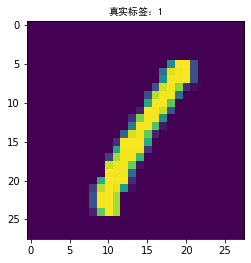

In [15]:

# 从训练集中随便取一个图像显示
i = 3
plt.imshow(np.reshape(x_train[i],(28,28)))
plt.title('真实标签：'+str(y_train[i]),fontproperties=zhfont)
plt.show()

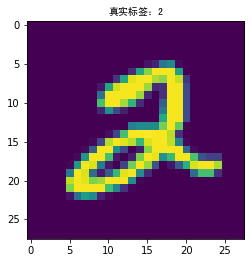

In [16]:
i = 5
plt.imshow(np.reshape(x_train[i],(28,28)))
plt.title('真实标签：'+str(y_train[i]),fontproperties=zhfont)
plt.show()

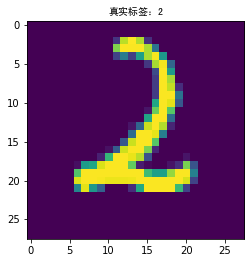

In [17]:
i = 122
plt.imshow(np.reshape(x_train[i],(28,28)))
plt.title('真实标签：'+str(y_train[i]),fontproperties=zhfont)
plt.show()

In [18]:
train_db = tf.data.Dataset.from_tensor_slices(tensors=(x_train, y_train))
train_db = train_db.map(map_func=train_preprocess).shuffle(buffer_size=1000).batch(batch_size=128)

test_db = tf.data.Dataset.from_tensor_slices(tensors=(x_test, y_test))
test_db = test_db.map(map_func=test_preprocess).batch(batch_size=128)

# 建立网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10),

])
model.build(input_shape=[None, 28 * 28])
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics
import numpy as np

(train_x,train_y),(test_x,test_y) = datasets.mnist.load_data()
train_x = tf.convert_to_tensor(train_x, dtype=tf.float32) / 255.
train_y = train_y.astype(np.int64)
train_dataset = tf.data.Dataset.from_tensor_slices((train_x,train_y))
# batch_size = 100,数据集最多重复10次
train_dataset = train_dataset.batch(100).repeat(10)

# 用keras.Sequential构建一个模型，并从keras.optimizers实例化一个随机梯度下降优化器。
model = tf.keras.Sequential([
    layers.Reshape(target_shape = (28 * 28,), input_shape=(28, 28)),
    layers.Dense(256, activation = tf.nn.relu),
    layers.Dense(256, activation = tf.nn.relu),
    layers.Dense(256, activation = tf.nn.relu),
    layers.Dense(10)
])

model.summary()


optimizer = optimizers.Adam(lr=1e-3)
acc = metrics.Accuracy()

# @tf.function
# def compute_loss(logits,label):
#     return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels = label))

for step,(x,y) in enumerate(train_dataset):

    """
    使用tf.GradientTape相对于网络的可训练变量手动计算损耗的梯度。GradientTape只是TensorFlow 2.0中执行梯度步骤的多种方法之一
    
    Tf.GradientTape：通过在上下文管理器中记录操作，针对给定变量手动计算损耗梯度。这是执行优化程序步骤的最灵活的方法，因为我们可以直接使用渐变，而无需预先定义的Keras模型或损失函数。
    Model.train（）：Keras的内置函数，用于遍历数据集并在其上拟合Keras.Model。这通常是训练Keras模型的最佳选择，并带有进度条显示，验证拆分，多处理和生成器支持的选项。
    Optimizer.minimize（）：通过给定的损失函数进行计算和微分，并执行一个步骤以通过梯度下降将其最小化。此方法易于实现，并且可以方便地应用于任何现有的计算图上，以进行有效的优化步骤。
    """
    with tf.GradientTape() as tape:

        # loss = compute_loss(logits=output, label=y)

        output = model(x)  # [batch_size,28,28] => [batch_size,10]
        y_onehot = tf.one_hot(y, depth=10) # [batch_size,1] => [batch_size,10]
        loss = tf.square(output - y_onehot)
        loss = tf.reduce_mean(loss)# [batch_size,10] => [batch_size,1]

    # 更新准确率
    acc.update_state(tf.argmax(output,axis = 1),y)

    # 求梯度
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))


    # 没200 步打印一次，并且重新统计准确率
    if step % 200 == 0:
        print(step, 'loss:', float(loss), 'acc:', acc.result().numpy())
        acc.reset_states()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
0 loss: 0.14088720083236694 acc: 0.1
200 loss: 0.01757950708270073 acc: 0.8942
400 loss: 0.006631070282310247 acc: